In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import sys
from functools import partial

from CASutils import averaging_utils as avg
from CASutils import linfit_utils as linfit
from CASutils import plotting_utils as myplot

In [2]:
plotpath="/project/cas/islas/python_plots/singleforcing_paper/figures/"

In [3]:
landfrac=xr.open_dataset("/project/cas/islas/python_savs/singleforcing_paper/DATA_SORT/ocn_wgts/LANDFRAC_LENS2.nc")

In [4]:
# pre-processor to ensure all lon and lat coordinates are the same.  Also adding flexibility for reading in seasonal data
# Taking the ensemble mean
def preprocessor(ds):
    ds['lon'] = landfrac.lon ; ds['lat'] = landfrac.lat
    ds = ds.mean('M')
    ds = ds.sel(year=slice(1920,2050))
    return ds

In [5]:
seas = 'am' ; var=['TREFHT','FSNT','FLNT','AODVIS','FSNS','FSDS']

### Read in CESM1

In [6]:
baselens1 = '/project/cas/islas/python_savs/singleforcing_paper/DATA_SORT/LENS1/'
lens1 = []
for ivar in var:
    dat = xr.open_mfdataset(baselens1+'LENS1_'+ivar+'_'+seas+'.nc', preprocess=partial(preprocessor))
    lens1.append(dat)
lens1 = xr.merge(lens1)
fsus = lens1.FSDS - lens1.FSNS
fsus = fsus.rename('FSUS')
lens1 = xr.merge([lens1, fsus])

In [7]:
basexaer1 = '/project/cas/islas/python_savs/singleforcing_paper/DATA_SORT/LENS1-SF/'
xaer1 = []
for ivar in var:
    dat = xr.open_mfdataset(basexaer1+'XAER_'+ivar+'_'+seas+'.nc', preprocess=partial(preprocessor))
    xaer1.append(dat)    
xaer1 = xr.merge(xaer1)
fsus = xaer1.FSDS - xaer1.FSNS
fsus = fsus.rename('FSUS')
xaer1 = xr.merge([xaer1, fsus])

In [8]:
baseaer1 = '/project/cas/islas/python_savs/singleforcing_paper/DATA_SORT/CESM1-AAER/'
aer1 = []
for ivar in var:
    dat = xr.open_mfdataset(baseaer1+'AAER_'+ivar+'_'+seas+'.nc', preprocess=partial(preprocessor))
    aer1.append(dat)
aer1 = xr.merge(aer1)
fsus = aer1.FSDS - aer1.FSNS
fsus = fsus.rename('FSUS')
aer1 = xr.merge([aer1, fsus])

### Read in CESM2

In [9]:
baselens2='/project/cas/islas/python_savs/singleforcing_paper/DATA_SORT/LENS2/'
lens2 = []
for ivar in var:
    dat = xr.open_mfdataset(baselens2+'LENS2_'+ivar+'_'+seas+'.nc', preprocess=partial(preprocessor))
    lens2.append(dat)
lens2 = xr.merge(lens2)
fsus = lens2.FSDS - lens2.FSNS
fsus = fsus.rename('FSUS')
lens2 = xr.merge([lens2, fsus])

In [10]:
basexaer2="/project/cas/islas/python_savs/singleforcing_paper/DATA_SORT/CESM2-XAAER/"
xaer2 = []
for ivar in var:
    dat = xr.open_mfdataset(basexaer2+'xAER_'+ivar+'_'+seas+'.nc', preprocess=partial(preprocessor))
    xaer2.append(dat)
xaer2 = xr.merge(xaer2)
fsus = xaer2.FSDS - xaer2.FSNS
fsus = fsus.rename('FSUS')
xaer2 = xr.merge([xaer2, fsus])

In [11]:
baseaer2="/project/cas/islas/python_savs/singleforcing_paper/DATA_SORT/LENS2-SF/"
aer2 = []
for ivar in var:
    dat = xr.open_mfdataset(baseaer2+'AAER_'+ivar+'_'+seas+'.nc', preprocess=partial(preprocessor))
    aer2.append(dat)
aer2 = xr.merge(aer2)
fsus = aer2.FSDS - aer2.FSNS
fsus = fsus.rename('FSUS')
aer2 = xr.merge([aer2, fsus])

### Calculate the global mean

In [12]:
lens1_gm = avg.cosweightlonlat(lens1, 0, 360, -90, 90)
lens2_gm = avg.cosweightlonlat(lens2, 0, 360, -90, 90)
aer1_gm = avg.cosweightlonlat(aer1, 0, 360, -90, 90)
aer2_gm = avg.cosweightlonlat(aer2, 0, 360, -90, 90)
xaer1_gm = avg.cosweightlonlat(xaer1, 0, 360, -90, 90)
xaer2_gm = avg.cosweightlonlat(xaer2, 0, 360, -90, 90)

In [13]:
alblens1 = lens1_gm.FSUS / lens1_gm.FSDS
alblens2 = lens2_gm.FSUS / lens2_gm.FSDS
albaer1 = aer1_gm.FSUS / aer1_gm.FSDS
albaer2 = aer2_gm.FSUS / aer2_gm.FSDS
albxaer1 = xaer1_gm.FSUS / xaer1_gm.FSDS
albxaer2 = xaer2_gm.FSUS / xaer2_gm.FSDS

In [14]:
lens1base = lens1_gm.sel(year=slice(1920,1940)).mean('year')
lens2base = lens2_gm.sel(year=slice(1920,1940)).mean('year')
aer1base = aer1_gm.sel(year=slice(1920,1940)).mean('year')
aer2base = aer2_gm.sel(year=slice(1920,1940)).mean('year')
xaer1base = xaer1_gm.sel(year=slice(1920,1940)).mean('year')
xaer2base = xaer2_gm.sel(year=slice(1920,1940)).mean('year')

In [15]:
alblens1base = alblens1.sel(year=slice(1920,1940)).mean('year')
alblens2base = alblens2.sel(year=slice(1920,1940)).mean('year')
albaer1base = albaer1.sel(year=slice(1920,1940)).mean('year')
albaer2base = albaer2.sel(year=slice(1920,1940)).mean('year')
albxaer1base = albxaer1.sel(year=slice(1920,1940)).mean('year')
albxaer2base = albxaer2.sel(year=slice(1920,1940)).mean('year')

In [16]:
lens1anoms = lens1_gm - lens1base
lens2anoms = lens2_gm - lens2base
aer1anoms = aer1_gm - aer1base
aer2anoms = aer2_gm - aer2base
xaer1anoms = xaer1_gm - xaer1base
xaer2anoms = xaer2_gm - xaer2base

In [17]:
alblens1anoms = alblens1 - alblens1base
alblens2anoms = alblens2 - alblens2base
albaer1anoms = albaer1 - albaer1base
albaer2anoms = albaer2 - albaer2base
albxaer1anoms = albxaer1 - albxaer1base
albxaer2anoms = albxaer2 - albxaer2base

In [18]:
aer1xwayanoms = lens1anoms - xaer1anoms
aer2xwayanoms = lens2anoms - xaer2anoms
albaer1xwayanoms = alblens1anoms - albxaer1anoms
albaer2xwayanoms = alblens2anoms - albxaer2anoms

### Calculate 21 year running mean 

In [19]:
# 21 year running means
def calc21ymean(dat):
    datm = dat.rolling(year=21, min_periods=21, center='True').mean('year').dropna('year')
    return datm

In [20]:
aer1anoms_21y = calc21ymean(aer1anoms)
aer2anoms_21y = calc21ymean(aer2anoms)
aer1xwayanoms_21y = calc21ymean(aer1xwayanoms)
aer2xwayanoms_21y = calc21ymean(aer2xwayanoms)

albaer1anoms_21y = calc21ymean(albaer1anoms)
albaer2anoms_21y = calc21ymean(albaer2anoms)
albaer1xwayanoms_21y = calc21ymean(albaer1xwayanoms)
albaer2xwayanoms_21y = calc21ymean(albaer2xwayanoms)

In [21]:
aer1anoms_21y = aer1anoms_21y.load() ; aer2anoms_21y = aer2anoms_21y.load()
aer1xwayanoms_21y = aer1xwayanoms_21y.load() ; aer2xwayanoms_21y = aer2xwayanoms_21y.load() 

albaer1anoms_21y = albaer1anoms_21y.load() ; albaer2anoms_21y = albaer2anoms_21y.load()
albaer1xwayanoms_21y = albaer1xwayanoms_21y.load() ; albaer2xwayanoms_21y = albaer2xwayanoms_21y.load() 

In [23]:
cesm1boot = xr.open_dataset("/project/cas/islas/python_savs/singleforcing_paper/DATA_SORT/BOOTSTRAP/fig3/CESM1_bootstrap.nc").load()
cesm2boot = xr.open_dataset("/project/cas/islas/python_savs/singleforcing_paper/DATA_SORT/BOOTSTRAP/fig3/CESM2_bootstrap.nc").load()
cesm1boot_toa = xr.open_dataset("/project/cas/islas/python_savs/singleforcing_paper/DATA_SORT/BOOTSTRAP/fig3/CESM1_bootstrap_TOA.nc").load()
cesm2boot_toa = xr.open_dataset("/project/cas/islas/python_savs/singleforcing_paper/DATA_SORT/BOOTSTRAP/fig3/CESM2_bootstrap_TOA.nc").load()
cesm1boot_fsusalb = xr.open_dataset("/project/cas/islas/python_savs/singleforcing_paper/DATA_SORT/BOOTSTRAP/fig3/CESM1_bootstrap_Albedo_FSUS.nc").load()
cesm2boot_fsusalb = xr.open_dataset("/project/cas/islas/python_savs/singleforcing_paper/DATA_SORT/BOOTSTRAP/fig3/CESM2_bootstrap_Albedo_FSUS.nc").load()

In [24]:
#del(cesm1boot_fsusalb)
#del(cesm2boot)

In [25]:
def setuppanel(x1, x2, y1, y2,titlestr):
    ax = fig.add_axes([x1, y1, x2-x1, y2-y1])
    ax.set_xlim(1930,2040)
    ax.set_xticks([1940,1960,1980,2000,2020,2040])
    ax.set_xticklabels(['1940','1960','1980','2000','2020','2040'], fontsize=14)
    ax.set_title(titlestr, fontsize=16)
    return ax

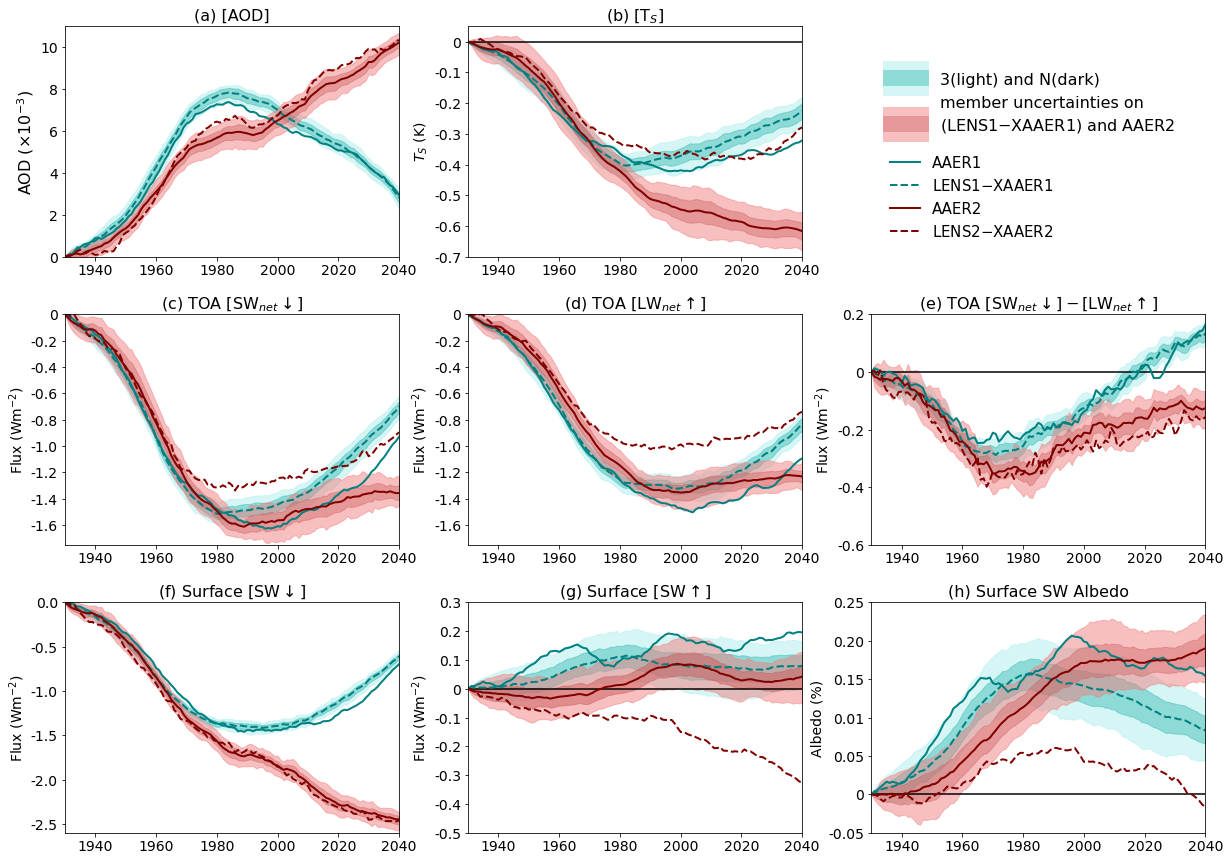

In [26]:
fig = plt.figure(figsize=(16,16))

ax = setuppanel(0.05,0.34,0.8,1,'(a) [AOD]')
ax.set_ylim(0,0.011)
ax.set_yticks([0,0.002,0.004,0.006,0.008,0.01])
ax.set_yticklabels(['0','2','4','6','8','10'], fontsize=14)
ax.set_ylabel('AOD ($\\times$10$^{-3}$)', fontsize=16)

ax.fill_between(cesm1boot.year, cesm1boot.AODVIS_min95_3, cesm1boot.AODVIS_max95_3, color='paleturquoise', alpha=0.5)
ax.fill_between(cesm1boot.year, cesm1boot.AODVIS_min95, cesm1boot.AODVIS_max95, color='lightseagreen', alpha=0.4)
ax.plot(aer1anoms_21y.year, aer1anoms_21y.AODVIS, color='teal', linewidth=2, label='AAER1')
ax.plot(aer1xwayanoms_21y.year, aer1xwayanoms_21y.AODVIS, color='teal', linewidth=2, linestyle='dashed', label='LENS1$-$XAAER1')

ax.fill_between(cesm2boot.year, cesm2boot.AODVIS_min95_3, cesm2boot.AODVIS_max95_3, color='lightcoral', alpha=0.5)
ax.fill_between(cesm2boot.year, cesm2boot.AODVIS_min95, cesm2boot.AODVIS_max95, color='indianred', alpha=0.4)
ax.plot(aer2anoms_21y.year, aer2anoms_21y.AODVIS, color='maroon', linewidth=2, label='AAER2')
ax.plot(aer2xwayanoms_21y.year, aer2xwayanoms_21y.AODVIS, color='maroon', linewidth=2, linestyle='dashed', label='LENS2$-$XAAER2')

leg = ax.legend(bbox_to_anchor=(3,0.5), prop={'size': 15})
leg.get_frame().set_linewidth(0.0)
myplot.plotbox(fig, 0.76,0.8,0.94,0.97, color='paleturquoise', alpha=0.5)
myplot.plotbox(fig, 0.76,0.8,0.948,0.962, color='lightseagreen', alpha=0.4)
myplot.plotbox(fig, 0.76,0.8,0.9,0.93, color='lightcoral', alpha=0.5)
myplot.plotbox(fig, 0.76,0.8,0.908,0.922, color='indianred', alpha=0.4)
fig.text(0.81,0.95,'3(light) and N(dark)', fontsize=16, ha='left') 
fig.text(0.81,0.93,'member uncertainties on', fontsize=16, ha='left')
fig.text(0.81,0.91,'(LENS1$-$XAAER1) and AAER2', fontsize=16, ha='left')

ax = setuppanel(0.4,0.69,0.8,1,'(b) [T$_{S}$]')
ax.set_ylim(-0.7,0.05)
ax.set_yticks([-0.7,-0.6,-0.5,-0.4,-0.3,-0.2,-0.1,0])
ax.set_yticklabels(['-0.7','-0.6','-0.5','-0.4','-0.3','-0.2','-0.1','0'], fontsize=14)
ax.set_ylabel('$T_{S}$ (K)', fontsize=14)
ax.plot([1930,2040],[0,0], color='black')

ax.fill_between(cesm1boot.year, cesm1boot.TREFHT_min95_3, cesm1boot.TREFHT_max95_3, color='paleturquoise', alpha=0.5)
ax.fill_between(cesm1boot.year, cesm1boot.TREFHT_min95, cesm1boot.TREFHT_max95, color='lightseagreen', alpha=0.4)
ax.plot(aer1anoms_21y.year, aer1anoms_21y.TREFHT, color='teal', linewidth=2, label='AAER1')
ax.plot(aer1xwayanoms_21y.year, aer1xwayanoms_21y.TREFHT, color='teal', linewidth=2, linestyle='dashed', label='LENS1$-$XAAER1')

ax.fill_between(cesm2boot.year, cesm2boot.TREFHT_min95_3, cesm2boot.TREFHT_max95_3, color='lightcoral', alpha=0.5)
ax.fill_between(cesm2boot.year, cesm2boot.TREFHT_min95, cesm2boot.TREFHT_max95, color='indianred', alpha=0.4)
ax.plot(aer2anoms_21y.year, aer2anoms_21y.TREFHT, color='maroon', linewidth=2, label='AAER2')
ax.plot(aer2xwayanoms_21y.year, aer2xwayanoms_21y.TREFHT, color='maroon', linewidth=2, linestyle='dashed', label='LENS2$-$XAAER2')


ax = setuppanel(0.05,0.34,0.55,0.75,'(c) TOA [SW$_{net}\\downarrow$]')
ax.set_ylim(-1.75,0)
ax.set_yticks([-1.6,-1.4,-1.2,-1,-0.8,-0.6,-0.4,-0.2,0])
ax.set_yticklabels(['-1.6','-1.4','-1.2','-1.0','-0.8','-0.6','-0.4','-0.2','0'], fontsize=14)
ax.set_ylabel('Flux (Wm$^{-2}}$)', fontsize=14)

ax.fill_between(cesm1boot.year, cesm1boot.FSNT_min95_3, cesm1boot.FSNT_max95_3, color='paleturquoise', alpha=0.5)
ax.fill_between(cesm1boot.year, cesm1boot.FSNT_min95, cesm1boot.FSNT_max95, color='lightseagreen', alpha=0.4)
ax.plot(aer1anoms_21y.year, aer1anoms_21y.FSNT, color='teal', linewidth=2, label='AAER1')
ax.plot(aer1xwayanoms_21y.year, aer1xwayanoms_21y.FSNT, color='teal', linewidth=2, linestyle='dashed', label='LENS1$-$XAAER1')

ax.fill_between(cesm2boot.year, cesm2boot.FSNT_min95_3, cesm2boot.FSNT_max95_3, color='lightcoral', alpha=0.5)
ax.fill_between(cesm2boot.year, cesm2boot.FSNT_min95, cesm2boot.FSNT_max95, color='indianred', alpha=0.4)
ax.plot(aer2anoms_21y.year, aer2anoms_21y.FSNT, color='maroon', linewidth=2, label='AAER2')
ax.plot(aer2xwayanoms_21y.year, aer2xwayanoms_21y.FSNT, color='maroon', linewidth=2, linestyle='dashed', label='LENS2$-$XAAER2')


ax = setuppanel(0.4,0.69,0.55,0.75,'(d) TOA [LW$_{net}\\uparrow$]')
ax.set_ylim(-1.75,0)
ax.set_yticks([-1.6,-1.4,-1.2,-1,-0.8,-0.6,-0.4,-0.2,0])
ax.set_yticklabels(['-1.6','-1.4','-1.2','-1.0','-0.8','-0.6','-0.4','-0.2','0'], fontsize=14)
ax.set_ylabel('Flux (Wm$^{-2}}$)', fontsize=14)

ax.fill_between(cesm1boot.year, cesm1boot.FLNT_min95_3, cesm1boot.FLNT_max95_3, color='paleturquoise', alpha=0.5)
ax.fill_between(cesm1boot.year, cesm1boot.FLNT_min95, cesm1boot.FLNT_max95, color='lightseagreen', alpha=0.4)
ax.plot(aer1anoms_21y.year, aer1anoms_21y.FLNT, color='teal', linewidth=2, label='AAER1')
ax.plot(aer1xwayanoms_21y.year, aer1xwayanoms_21y.FLNT, color='teal', linewidth=2, linestyle='dashed', label='LENS1$-$XAAER1')

ax.fill_between(cesm2boot.year, cesm2boot.FLNT_min95_3, cesm2boot.FLNT_max95_3, color='lightcoral', alpha=0.5)
ax.fill_between(cesm2boot.year, cesm2boot.FLNT_min95, cesm2boot.FLNT_max95, color='indianred', alpha=0.4)
ax.plot(aer2anoms_21y.year, aer2anoms_21y.FLNT, color='maroon', linewidth=2, label='AAER2')
ax.plot(aer2xwayanoms_21y.year, aer2xwayanoms_21y.FLNT, color='maroon', linewidth=2, linestyle='dashed', label='LENS2$-$XAAER2')


ax = setuppanel(0.75,1.04,0.55,0.75,'(e) TOA [SW$_{net}\\downarrow]-[$LW$_{net}\\uparrow$]')
ax.set_ylim(-0.6,0.2)
ax.set_yticks([-0.6,-0.4,-0.2,0,0.2])
ax.set_yticklabels(['-0.6','-0.4','-0.2','0','0.2'], fontsize=14)
ax.set_ylabel('Flux (Wm$^{-2}$)', fontsize=14)
ax.plot([1920,2040],[0,0], color='black')

ax.fill_between(cesm1boot_toa.year, cesm1boot_toa.TOA_min95_3, cesm1boot_toa.TOA_max95_3, color='paleturquoise', alpha=0.5)
ax.fill_between(cesm1boot_toa.year, cesm1boot_toa.TOA_min95, cesm1boot_toa.TOA_max95, color='lightseagreen', alpha=0.4)
ax.plot(aer1anoms_21y.year, aer1anoms_21y.FSNT - aer1anoms_21y.FLNT, color='teal', linewidth=2, label='AAER1')
ax.plot(aer1xwayanoms_21y.year, aer1xwayanoms_21y.FSNT - aer1xwayanoms_21y.FLNT, color='teal', linewidth=2, linestyle='dashed', label='LENS1$-$XAAER1')

ax.fill_between(cesm2boot_toa.year, cesm2boot_toa.TOA_min95_3, cesm2boot_toa.TOA_max95_3, color='lightcoral', alpha=0.5)
ax.fill_between(cesm2boot_toa.year, cesm2boot_toa.TOA_min95, cesm2boot_toa.TOA_max95, color='indianred', alpha=0.4)
ax.plot(aer2anoms_21y.year, aer2anoms_21y.FSNT - aer2anoms_21y.FLNT, color='maroon', linewidth=2, label='AAER2')
ax.plot(aer2xwayanoms_21y.year, aer2xwayanoms_21y.FSNT - aer2xwayanoms_21y.FLNT, color='maroon', linewidth=2, linestyle='dashed', label='LENS2$-$XAAER2')

ax = setuppanel(0.05,0.34,0.3,0.5,'(f) Surface [SW$\\downarrow$]')
ax.set_ylim(-2.6,0.)
ax.set_yticks([-2.5,-2,-1.5,-1,-0.5,0])
ax.set_yticklabels(['-2.5','-2.0','-1.5','-1.0','-0.5','0.0'], fontsize=14)
ax.set_ylabel('Flux (Wm$^{-2}$)', fontsize=14)

ax.fill_between(cesm1boot.year, cesm1boot.FSDS_min95_3, cesm1boot.FSDS_max95_3, color='paleturquoise', alpha=0.5)
ax.fill_between(cesm1boot.year, cesm1boot.FSDS_min95, cesm1boot.FSDS_max95, color='lightseagreen', alpha=0.4)
ax.plot(aer1anoms_21y.year, aer1anoms_21y.FSDS, color='teal', linewidth=2, label='AAER1')
ax.plot(aer1xwayanoms_21y.year, aer1xwayanoms_21y.FSDS, color='teal', linewidth=2, linestyle='dashed', label='LENS1$-$XAAER1')

ax.fill_between(cesm2boot.year, cesm2boot.FSDS_min95_3, cesm2boot.FSDS_max95_3, color='lightcoral', alpha=0.5)
ax.fill_between(cesm2boot.year, cesm2boot.FSDS_min95, cesm2boot.FSDS_max95, color='indianred', alpha=0.4)
ax.plot(aer2anoms_21y.year, aer2anoms_21y.FSDS, color='maroon', linewidth=2, label='AAER2')
ax.plot(aer2xwayanoms_21y.year, aer2xwayanoms_21y.FSDS, color='maroon', linewidth=2, linestyle='dashed', label='LENS2$-$XAAER2')


ax = setuppanel(0.4,0.69,0.3,0.5,'(g) Surface [SW$\\uparrow$]')
ax.set_ylim(-0.5,0.3)
ax.set_yticks([-0.5,-0.4,-0.3,-0.2,-0.1,0,0.1,0.2,0.3])
ax.set_yticklabels(['-0.5','-0.4','-0.3','-0.2','-0.1','0','0.1','0.2','0.3'], fontsize=14)
ax.set_ylabel('Flux (Wm$^{-2}$)', fontsize=14)
ax.plot([1930,2040],[0,0], color='black')

ax.fill_between(cesm1boot_fsusalb.year, cesm1boot_fsusalb.FSUS_min95_3, cesm1boot_fsusalb.FSUS_max95_3, color='paleturquoise', alpha=0.5)
ax.fill_between(cesm1boot_fsusalb.year, cesm1boot_fsusalb.FSUS_min95, cesm1boot_fsusalb.FSUS_max95, color='lightseagreen', alpha=0.4)
ax.plot(aer1anoms_21y.year, aer1anoms_21y.FSUS, color='teal', linewidth=2, label='AER1')
ax.plot(aer1xwayanoms_21y.year, aer1xwayanoms_21y.FSUS, color='teal', linewidth=2, linestyle='dashed', label='LENS1$-$XAER1')

ax.fill_between(cesm2boot_fsusalb.year, cesm2boot_fsusalb.FSUS_min95_3, cesm2boot_fsusalb.FSUS_max95_3, color='lightcoral', alpha=0.5)
ax.fill_between(cesm2boot_fsusalb.year, cesm2boot_fsusalb.FSUS_min95, cesm2boot_fsusalb.FSUS_max95, color='indianred', alpha=0.5)
ax.plot(aer2anoms_21y.year, aer2anoms_21y.FSUS, color='maroon', linewidth=2, label='AAER2')
ax.plot(aer2xwayanoms_21y.year, aer2xwayanoms_21y.FSUS, color='maroon', linewidth=2, linestyle='dashed', label='LENS2$-$XAER2')


ax = setuppanel(0.75,1.04,0.3,0.5,'(h) Surface SW Albedo')
ax.set_ylim(-0.05,0.25)
ax.set_yticks([-0.05,0,0.05,0.1,0.15,0.2,0.25])
ax.set_yticklabels(['-0.05','0','0.05','0.01','0.15','0.20','0.25'], fontsize=14)
ax.set_ylabel('Albedo (%)', fontsize=14)
ax.plot([1930,2040],[0,0], color='black')

ax.fill_between(cesm1boot_fsusalb.year, 100.*cesm1boot_fsusalb.Albedo_min95_3, 100.*cesm1boot_fsusalb.Albedo_max95_3, color='paleturquoise', alpha=0.5)
ax.fill_between(cesm1boot_fsusalb.year, 100.*cesm1boot_fsusalb.Albedo_min95, 100.*cesm1boot_fsusalb.Albedo_max95, color='lightseagreen', alpha=0.4)
ax.plot(aer1anoms_21y.year, 100.*albaer1anoms_21y, color='teal', linewidth=2, label='AER1')
ax.plot(aer1xwayanoms_21y.year, 100.*albaer1xwayanoms_21y, color='teal', linewidth=2, linestyle='dashed', label='LENS1$-$XAER1')

ax.fill_between(cesm2boot_fsusalb.year, 100.*cesm2boot_fsusalb.Albedo_min95_3, 100.*cesm2boot_fsusalb.Albedo_max95_3, color='lightcoral', alpha=0.5)
ax.fill_between(cesm2boot_fsusalb.year, 100.*cesm2boot_fsusalb.Albedo_min95, 100.*cesm2boot_fsusalb.Albedo_max95, color='indianred', alpha=0.4)
ax.plot(aer2anoms_21y.year, 100.*albaer2anoms_21y, color='maroon', linewidth=2, label='FSDS')
ax.plot(aer2xwayanoms_21y.year, 100.*albaer2xwayanoms_21y, color='maroon', linewidth=2, linestyle='dashed', label='LENS2$-$XAER2')

fig.savefig(plotpath+'fig3.png', bbox_inches='tight', facecolor='white')
fig.savefig(plotpath+'fig3.pdf', bbox_inches='tight', facecolor='white')

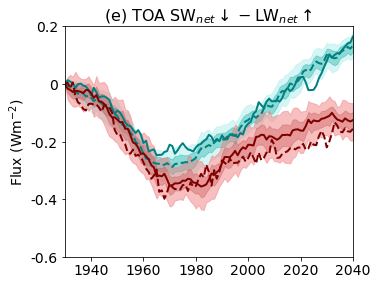

In [26]:
fig = plt.figure(figsize=(16,16))

ax = setuppanel(0.75,1,0.55,0.75,'(e) TOA SW$_{net}\\downarrow-$LW$_{net}\\uparrow$')
ax.set_ylim(-0.6,0.2)
ax.set_yticks([-0.6,-0.4,-0.2,0,0.2])
ax.set_yticklabels(['-0.6','-0.4','-0.2','0','0.2'], fontsize=14)
ax.set_ylabel('Flux (Wm$^{-2}$)', fontsize=14)

ax.fill_between(cesm1boot_toa.year, cesm1boot_toa.TOA_min95_3, cesm1boot_toa.TOA_max95_3, color='paleturquoise', alpha=0.5)
ax.fill_between(cesm1boot_toa.year, cesm1boot_toa.TOA_min95, cesm1boot_toa.TOA_max95, color='lightseagreen', alpha=0.4)
ax.plot(aer1anoms_21y.year, aer1anoms_21y.FSNT - aer1anoms_21y.FLNT, color='teal', linewidth=2, label='AAER1')
ax.plot(aer1xwayanoms_21y.year, aer1xwayanoms_21y.FSNT - aer1xwayanoms_21y.FLNT, color='teal', linewidth=2, linestyle='dashed', label='LENS1$-$XAAER1')

ax.fill_between(cesm2boot_toa.year, cesm2boot_toa.TOA_min95_3, cesm2boot_toa.TOA_max95_3, color='lightcoral', alpha=0.5)
ax.fill_between(cesm2boot_toa.year, cesm2boot_toa.TOA_min95, cesm2boot_toa.TOA_max95, color='indianred', alpha=0.4)
ax.plot(aer2anoms_21y.year, aer2anoms_21y.FSNT - aer2anoms_21y.FLNT, color='maroon', linewidth=2, label='AAER2')
ax.plot(aer2xwayanoms_21y.year, aer2xwayanoms_21y.FSNT - aer2xwayanoms_21y.FLNT, color='maroon', linewidth=2, linestyle='dashed', label='LENS2$-$XAAER2')



In [ ]:
print(cesm2boot)